In [346]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import SGDClassifier ,HuberRegressor, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [98]:
#От бизнеса требование - определение является ли опухоль раковой или нет.
#Нужна максимальная точность в определении ответов ДА, ибо лучше если
#машина будет определять некоторые нет, как да, дабы потом ещё доп 
#опследования велись

"""
Можно найти для штук нужных мне по 10 алгоритмов и чисто их заучить и
понять, да ими только на олимпиаде пользоваться
"""

df = pd.read_csv("C:/Users/User/Documents/GitHub/BreastCancer/db/breast-cancer.csv")
#M - cancer
#B - not cancer

#М в 1.  В в 0. Вот такие изменения в датасете

diagnosis_code = {"B":0, "M":1}


df["diagnosis"] = df.diagnosis.map(diagnosis_code)

inputs_cols = list(df.columns)[2: ]
target_col = "diagnosis" 

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)


train_inputs = train_df[inputs_cols].copy()
train_targets = train_df["diagnosis"].copy()

val_inputs = val_df[inputs_cols].copy()
val_targets = val_df["diagnosis"].copy()

test_inputs = test_df[inputs_cols].copy()
test_targets = test_df["diagnosis"].copy()




In [99]:

scaler = MinMaxScaler()
scaler.fit(df[inputs_cols])

train_inputs[inputs_cols] = scaler.transform(train_inputs[inputs_cols])
val_inputs[inputs_cols] = scaler.transform(val_inputs[inputs_cols])
test_inputs[inputs_cols] = scaler.transform(test_inputs[inputs_cols])


In [100]:
#Baseline models
#Минимальная полезность модели должна быть выше 63%
def always_yes(inputs):
    return np.full(len(inputs), 1)
def always_no(inputs):
    return np.full(len(inputs), 0)
def random(inputs):
    return np.random.randint(0,2,len(inputs))

train_preds = always_yes(train_inputs)

print(accuracy_score(train_targets, train_preds))

train_preds = always_no(train_inputs)
print(accuracy_score(train_targets, train_preds))

train_preds = random(train_inputs)
print(accuracy_score(train_targets, train_preds))

0.37089201877934275
0.6291079812206573
0.5117370892018779


0.9976525821596244
0.972027972027972
0.9649122807017544


In [102]:
tree_model = DecisionTreeClassifier(max_depth =5 , random_state = 42,
                                   min_impurity_decrease = 1e-9)
tree_model.fit(train_inputs, train_targets)

print(tree_forest.score(train_inputs, train_targets))
print(tree_forest.score(val_inputs, val_targets))

0.9976525821596244
0.972027972027972


<Axes: title={'center': 'Features importances'}, xlabel='importance', ylabel='feature'>

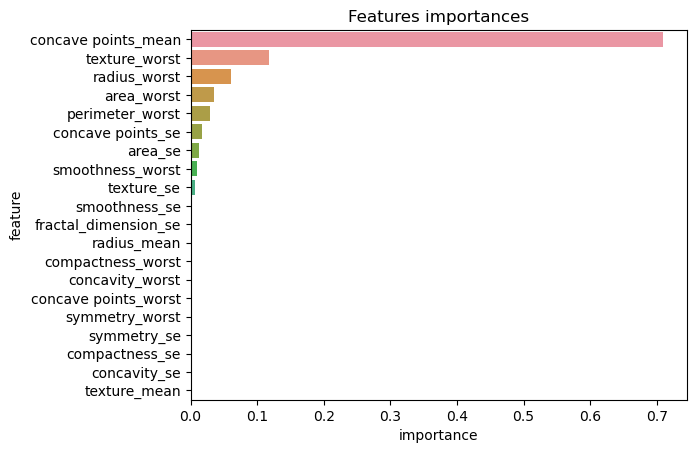

0.9812206572769953
0.9790209790209791
0.9736842105263158
 


C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [170]:
def predict_and_plot(inputs, targets, model, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    print("Accuracy:{:.2f}%".format(accuracy*100))
    
    cf=confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('prediction')
    plt.ylabel('Target')
    plt.title('{} confusion Matrix'.format(name));
    print("True {0}False {1}".format(cf[1][0], cf[1][1]))
    return preds

Tree forest 
0.9929577464788732
0.9790209790209791
0.9736842105263158
Accuracy:97.37%
True 0.023255813953488372False 0.9767441860465116
orig - 0.9649122807017544
 
LinearSVC
0.9812206572769953
0.986013986013986
0.9824561403508771
Accuracy:98.25%
True 0.023255813953488372False 0.9767441860465116
orig - 0.9736842105263158
 


C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


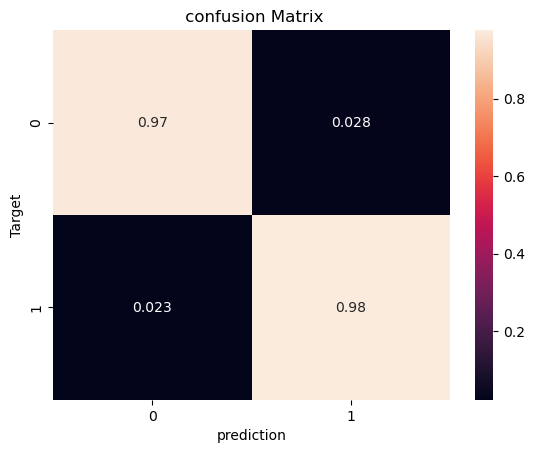

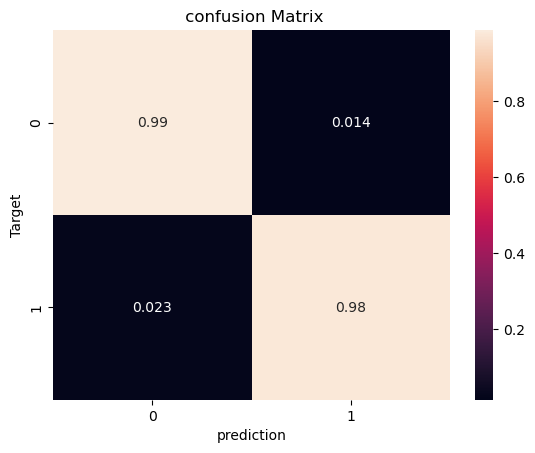

In [325]:
tree_forest = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators = 26,
                                      max_depth = 6, min_impurity_decrease = 1e-6,
                                     max_samples = 0.9)
tree_forest.fit(train_inputs, train_targets)

print("Tree forest ")
print(tree_forest.score(train_inputs, train_targets))
print(tree_forest.score(val_inputs, val_targets))
print(tree_forest.score(test_inputs, test_targets))
predict_and_plot(test_inputs, test_targets, tree_forest)
print("orig - 0.9649122807017544")
print(" ")


lclf = LinearSVC(random_state = 42, max_iter = 3)
lclf.fit(train_inputs, train_targets)

print("LinearSVC")
print(lclf.score(train_inputs, train_targets))
print(lclf.score(val_inputs, val_targets))
print(lclf.score(test_inputs, test_targets))

predict_and_plot(test_inputs, test_targets, lclf)
print("orig - 0.9736842105263158")
print(" ")


SGDClassifier sgdc
0.9835680751173709
0.993006993006993
0.9912280701754386
Accuracy:99.12%
True 0.023255813953488372False 0.9767441860465116
orig - 0.9736842105263158
 
PassiveAggressiveClassifier
0.9272300469483568
0.9370629370629371
0.9473684210526315
Accuracy:94.74%
True 0.0False 1.0
orig - 0.9649122807017544
 


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


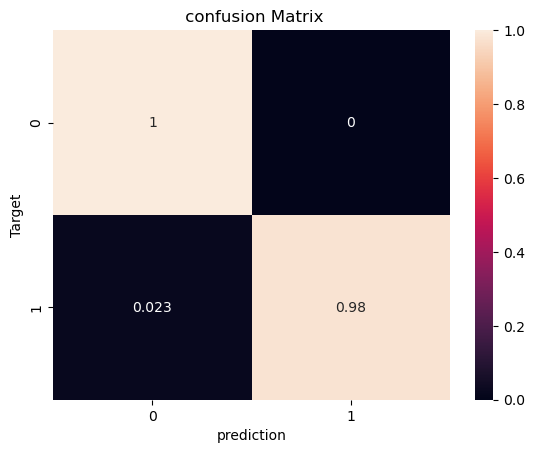

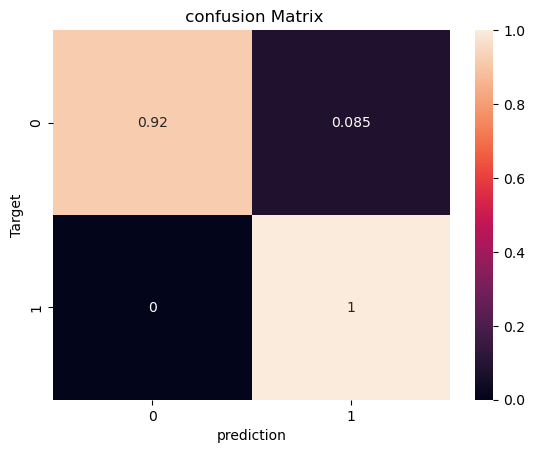

In [324]:
sgdc = SGDClassifier(shuffle=True, random_state = 42, 
                     loss = 'squared_hinge',
                     max_iter = 100, 
                     average = True)
sgdc.fit(train_inputs, train_targets)
print("SGDClassifier sgdc")
print(sgdc.score(train_inputs, train_targets))
print(sgdc.score(val_inputs, val_targets))
print(sgdc.score(test_inputs, test_targets))

predict_and_plot(test_inputs, test_targets, sgdc_sensitive)
print("orig - 0.9736842105263158")

print(" ")

pac = PassiveAggressiveClassifier(random_state = 42, max_iter = 2,)
pac.fit(train_inputs, train_targets)

print("PassiveAggressiveClassifier")
print(pac.score(train_inputs, train_targets))
print(pac.score(val_inputs, val_targets))
print(pac.score(test_inputs, test_targets))

predict_and_plot(test_inputs, test_targets, pac)
print("orig - 0.9649122807017544")
print(" ")


PassiveAggressiveClassifier
0.9272300469483568
0.9370629370629371
0.9473684210526315
Accuracy:94.74%
True 0.0False 1.0
orig - 0.9649122807017544
 


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


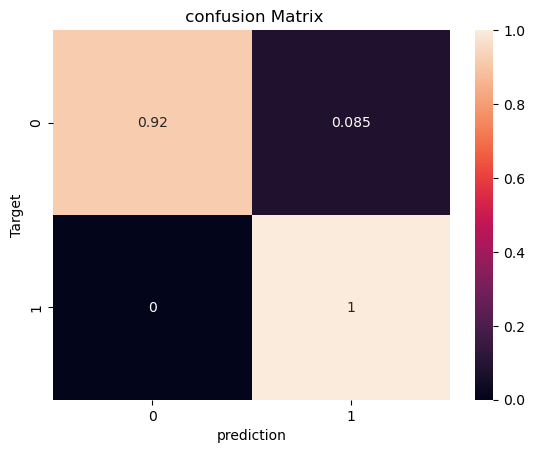

###### 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number 

Stack
0.9835680751173709
0.993006993006993
0.9912280701754386
Accuracy:99.12%
True 0.023255813953488372False 0.9767441860465116
Accuracy:99.30%
True 0.018518518518518517False 0.9814814814814815
Accuracy:98.36%
True 0.03164556962025317False 0.9683544303797469


array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

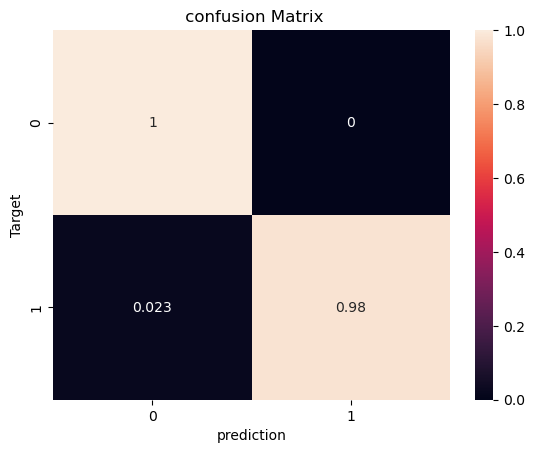

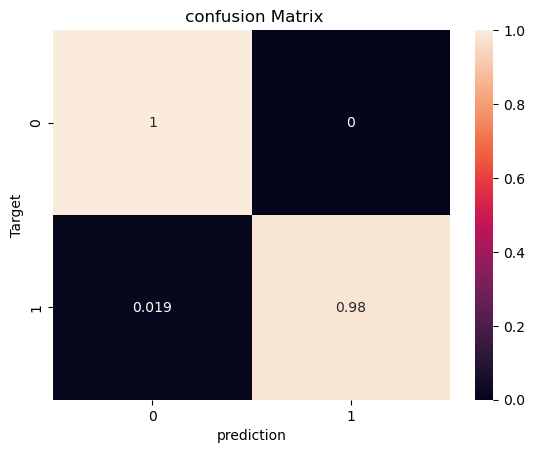

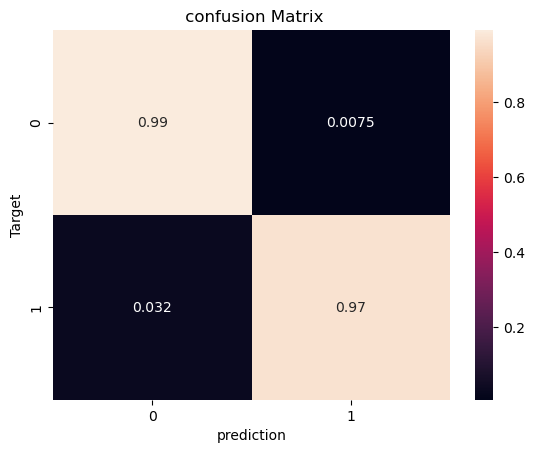

In [377]:
estimators = [('pac', pac), ('sgdc',sgdc), ('tree_forest', tree_forest),('lclf',lclf)]
stack = StackingClassifier(estimators = estimators,stack_method='predict',
                           final_estimator = DecisionTreeClassifier(max_depth = 3),)
#stack_method{‘auto’, ‘predict_proba’, ‘decision_function’, ‘predict’}, default=’auto’

stack.fit(train_inputs, train_targets)

print("Stack")
print(stack.score(train_inputs, train_targets))
print(stack.score(val_inputs, val_targets))
print(stack.score(test_inputs, test_targets))
predict_and_plot(test_inputs, test_targets, stack)

predict_and_plot(val_inputs, val_targets, stack)

predict_and_plot(train_inputs, train_targets, stack)

In [385]:
import pickle
columns = train_inputs.columns
with open("breast_cancer.pkl", "wb") as f:
    pickle.dump(stack, f)
with open("sgdc.pkl", "wb") as f:
    pickle.dump(sgdc, f)
with open("pac.pkl", "wb") as f:
    pickle.dump(pac, f)
with open("tree_forest.pkl", "wb") as f:
    pickle.dump(tree_forest, f)
with open("lclf.pkl", "wb") as f:
    pickle.dump(lclf, f)
with open("columns.pkl", "wb") as f:
    pickle.dump(columns, f)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
287     0.279663      0.115320        0.263285   0.157964         0.152749   
512     0.303800      0.365573        0.309930   0.175270         0.523337   
402     0.282976      0.290159        0.279110   0.161909         0.188499   
446     0.509679      0.619547        0.507981   0.355504         0.427372   
210     0.643618      0.420358        0.628222   0.486320         0.345491   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
287          0.054935        0.052952             0.058201       0.139899   
512          0.391142        0.338566             0.406163       0.533333   
402          0.182842        0.095056             0.093588       0.411111   
446          0.343599        0.397844             0.412177       0.329798   
210          0.354027        0.384255             0.475199       0.356061   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
287